# Density Based Clustering (DBSCAN)

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_path = '../data/complete_dataset_fe.csv'
dataset = pd.read_csv(file_path)
dataset.head()

/tmp/ipykernel_24027/2781514253.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file_path)


,race_url,race_name,points,uci_points,length,climb_total,profile,startlist_quality,date,position,...,race_stage,race_season,cyclist_bmi,cyclist_age_group,climb_percentage,cyclist_climb_power,race_physical_effort,race_prestige,cyclist_previous_experience,cyclist_days_since_last_race
0,tour-de-suisse/1975/stage-9b,Tour de Suisse,50.0,NaN,20.4,NaN,NaN,549,1975-06-20,1.000000,...,stage-9b,spring,22.256908,<25,NaN,NaN,NaN,0.038942,NaN,NaN
1,paris-nice/1976/prologue,Paris - Nice,50.0,NaN,6.5,NaN,NaN,779,1976-03-07,1.000000,...,prologue,winter,22.256908,25-27,NaN,NaN,NaN,0.057348,NaN,261.0
2,omloop-het-nieuwsblad/1977/result,Omloop Nieuwsblad,125.0,NaN,201.0,NaN,NaN,595,1977-03-05,1.000000,...,result,winter,22.256908,25-27,NaN,NaN,NaN,0.114048,NaN,363.0
3,omloop-het-nieuwsblad/1978/result,Omloop Nieuwsblad,125.0,NaN,218.0,NaN,NaN,493,1978-03-04,0.866667,...,result,winter,22.256908,27-29,NaN,NaN,NaN,0.093641,NaN,364.0
4,tour-de-france/1978/prologue,Tour de France,100.0,NaN,5.2,0.027,1.0,1241,1978-06-29,0.256881,...,prologue,spring,22.256908,27-29,0.005192,0.000329,0.000024,0.193636,NaN,117.0


In [5]:
# Select relevant columns for clustering
columns_to_use = ['points', 'uci_points', 'length', 'climb_total', 'cyclist_age',
                  'cyclist_bmi', 'climb_percentage', 'race_prestige', 'race_physical_effort']

# Drop rows with missing values
data_for_clustering = dataset[columns_to_use].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

In [6]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(data_scaled)

# Add cluster labels to the data
data_for_clustering['cluster'] = clusters

# Display cluster distribution
print(data_for_clustering['cluster'].value_counts())
print(data_for_clustering.head())

cluster
 2      66181
 4      35877
 19     30829
-1      13486
 36     11036
        ...  
 280        7
 278        6
 281        6
 287        6
 264        6
Name: count, Length: 291, dtype: int64
    points  uci_points  length  climb_total  cyclist_age  cyclist_bmi  \
58   275.0       500.0   258.0        4.187         27.0     21.67211   
59    50.0        60.0     6.0        0.049         27.0     21.67211   
60    50.0        60.0   172.7        2.611         27.0     21.67211   
61    50.0        60.0   159.3        1.618         27.0     21.67211   
62    50.0        60.0   143.2        2.896         27.0     21.67211   

    climb_percentage  race_prestige  race_physical_effort  cluster  
58          0.016229       0.434281              0.405752        0  
59          0.008167       0.063430              0.000053        1  
60          0.015119       0.063430              0.127026        2  
61          0.010157       0.063430              0.096811        2  
62          0.0

In [7]:
# Analyze the mean and standard deviation of numerical features for each cluster
cluster_stats = data_for_clustering.groupby('cluster').agg(['mean', 'std'])
print("Cluster Statistics:\n", cluster_stats)

Cluster Statistics:
              points             uci_points                  length             \
               mean        std        mean         std        mean        std   
cluster                                                                         
-1       101.368456  68.149038  128.696426  166.742207  163.322442  70.560133   
 0       275.000000   0.000000  500.000000    0.000000  252.862745   5.007945   
 1        50.000000   0.000000   42.375452   24.255300   13.872695   8.262523   
 2        50.000000   0.000000   39.525906   23.875429  175.195099  23.731660   
 3        50.000000   0.000000   60.000000    0.000000  100.000000   0.000000   
...             ...        ...         ...         ...         ...        ...   
 285      80.000000   0.000000  100.000000    0.000000  186.781818   3.300248   
 286      80.000000   0.000000  100.000000    0.000000  200.864286  13.290575   
 287     225.000000   0.000000  500.000000    0.000000  221.400000   0.000000   
 288   

In [8]:
# Identify outliers (cluster label -1)
outliers = data_for_clustering[data_for_clustering['cluster'] == -1]
print("\nNumber of outliers:", len(outliers))


Number of outliers: 13486


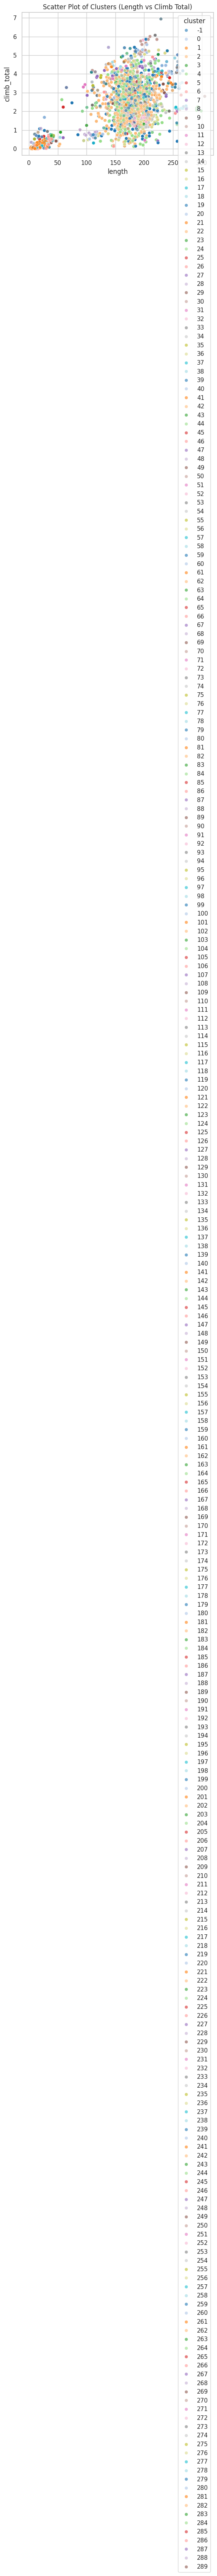

In [9]:
# Scatter plot of a few features to visualize clusters
sns.set(style="whitegrid")
sns.scatterplot(
    x='length', y='climb_total', hue='cluster', palette='tab20',
    data=data_for_clustering, legend='full', alpha=0.6
)
plt.title("Scatter Plot of Clusters (Length vs Climb Total)")
plt.show()

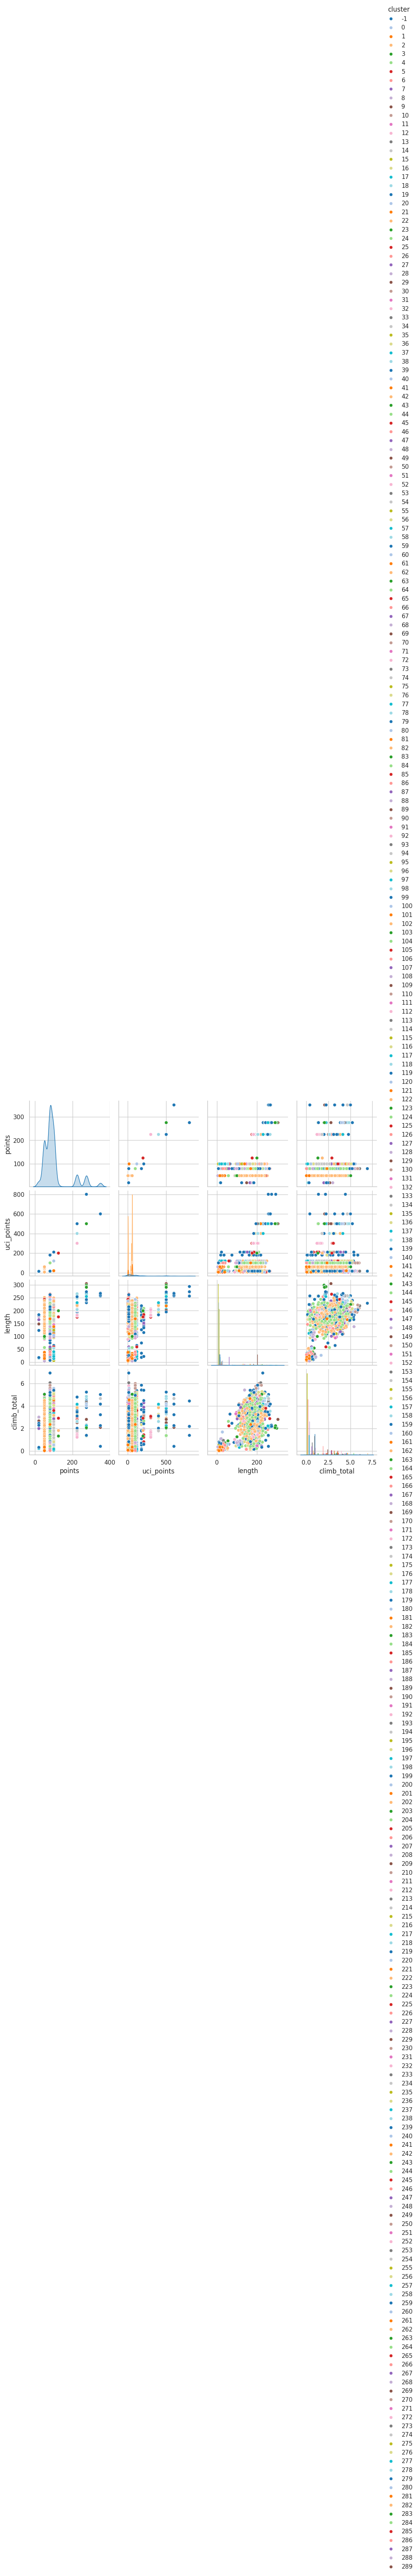

In [10]:
# Pair plot for a subset of columns
data_subset = data_for_clustering[['points', 'uci_points', 'length', 'climb_total', 'cluster']]
sns.pairplot(data_subset, hue='cluster', palette='tab20')
plt.show()